# Basic Time Series Models - Lab

## Introduction

Now that you have an initial understanding of the the White Noise and the Random Walk model, let's try to generate some examples!

## Objectives

You will be able to:
- Explain what the goal is of time series modeling
- Understand and explain what a White Noise model is
- Understand and explain what a Random Walk model is
- Understand the mathematical formulations of Random Walk and White Noise models

## A White Noise Model

To get a good sense of how a model works, it is always a good idea to generate a process. Let's consider the following example:
- Every day in August, September and October 2018, Nina takes the subway to work. Let's ignore weekends for now and assume that Nina works every day.
- We know that on average, it takes her 25 minutes, and the standard deviation is 4 minutes. 
- Create and visualize a time series that reflects this information.

Let's import pandas, numpy and matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(12) # do not change this seed.

Create the dates. You can do this using `pd.date_range`, more info [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html).

In [3]:
# your code here
dates = pd.date_range(start='8/1/2018', end='10/31/2018')

Generate the values for the white noise process representing Nina's commute in August and September.

In [8]:
# your code here
commute_time = np.random.normal(25,4,len(dates))

Create a time series with the dates and the commute times.

In [15]:
# your code here
ts = pd.DataFrame([])
ts['dates'] = dates
ts['commute_time'] = commute_time
ts.dates = pd.to_datetime(ts.dates)
ts.set_index('dates', inplace=True)

In [16]:
ts.head()

,commute_time
dates,
2018-08-01,26.089564
2018-08-02,21.123294
2018-08-03,28.487872
2018-08-04,19.214562
2018-08-05,22.854075


Visualize the time series and set appropriate axis labels.

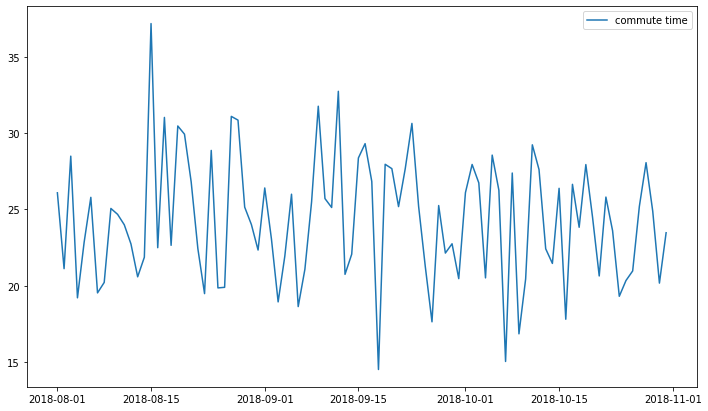

In [18]:
# your code here
plt.figure(figsize=(12,7))
plt.plot(ts, label='commute time')
plt.legend()

Print Nina's shortest and longest commute.

In [28]:
# your code here
print(f'Shortest commute is {ts.commute_time.min()} minutes')
print(f'Longest commute is {ts.commute_time.max()} minutes')

Shortest commute is 14.522026709957242 minutes
Longest commute is 37.16674482548859 minutes


Look at the distribution of commute times.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123ae72b0>]],
      dtype=object)

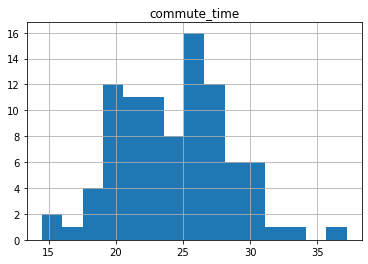

In [31]:
# your code here
ts.hist(bins=15)

Compute the standard deviation and the mean of the commute series. The fact that the mean and standard error are constant over time is crucial!

In [36]:
# your code here
print(f'Mean is {ts.commute_time.mean()}')
print(f'Standard Deviation is {ts.commute_time.std()}')

Mean is 24.299479202406868
Standard Deviation is 4.146119962325984


Now, let's look at the mean and standard error for August and October respectively. 

In [42]:
ts.groupby(pd.Grouper(freq='M')).mean()

,commute_time
dates,
2018-08-31,24.735249
2018-09-30,24.419604
2018-10-31,23.747460


In [47]:
# your code here
print(f"Mean for August is {ts.groupby(pd.Grouper(freq='M')).commute_time.mean()[0]}")
print(f"Standard Deviation for August is {ts.groupby(pd.Grouper(freq='M')).commute_time.std()[0]}")
print(f"Mean for August is {ts.groupby(pd.Grouper(freq='M')).commute_time.mean()[2]}")
print(f"Standard Deviation for October is {ts.groupby(pd.Grouper(freq='M')).commute_time.std()[2]}")

Mean for August is 24.73524858352787
Standard Deviation for August is 4.435208743201132
Mean for August is 23.747459598030975
Standard Deviation for October is 3.77475454699837


Because you've generated this data, you know that the mean and constant will be the same over time. But comparing mean and standard deviation over time is useful practice for real data examples to check if a process is White Noise!

## A Random Walk Model

Remember from the lecture that the Random Walk Model:

- Has no specified mean or variance
- Has a strong dependence over time

Mathematically, this can be written as:

$$Y_t = Y_{t-1} + \epsilon_t$$

Because today's value depends on yesterday's, you need a starting value when you start off your time series. In practice, this is what the first few time series values look like:
$$ Y_0 = \text{some specified starting value}$$
$$Y_1= Y_{0}+ \epsilon_1 $$
$$Y_2= Y_{1}+ \epsilon_2 = Y_{0} + \epsilon_1 + \epsilon_2  $$
$$Y_3= Y_{2}+ \epsilon_3 = Y_{0} + \epsilon_1 + \epsilon_2 + \epsilon_3 $$
$$\ldots $$

Keeping this in mind, let's create a random walk model:
- starting from a value of 1000 USD of a share value upon a company's first IPO (initial public offering) in 2010 until end of November of the same year, generate a random walk model with a white noise error term, which has a standard error of 10.

In [49]:
# keep the random seed
np.random.seed(11)

# create a series with the specified dates
dates = pd.date_range(start='01/01/2010',end='11/30/2010')
error = np.random.normal(0,10,len(dates))
def random_walk(start, error):
    return start + np.cumsum(error)

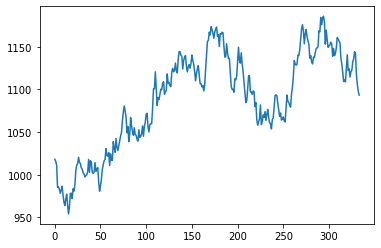

In [62]:
plt.plot(random_walk(1000,error))

You can see how this very much looks like the exchange rate series you looked at in the lecture!

## Random Walk with a Drift

Repeat the above, but include a drift parameter $c$ of 8 now!

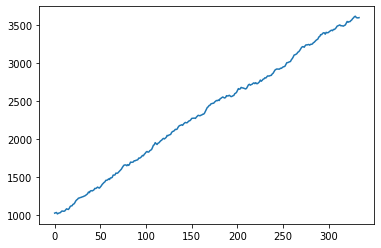

In [86]:
def random_walk(start, error):
    return start + np.cumsum(error+8)

plt.plot(random_walk(1000, error))

Note that there is a very strong drift here!

## Differencing in a Random Walk model

One important property of the Random Walk model is that a differenced random walk returns a white noise. This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

Plot the differenced time series for the shares time series (no drift).

In [87]:
# your code here
rand = pd.DataFrame(random_walk(1000,error), columns=['Price'])
rand['dates'] = dates
rand.set_index('dates', inplace=True)

In [88]:
rand_diff = rand.diff()
rand_diff.dropna(inplace=True)

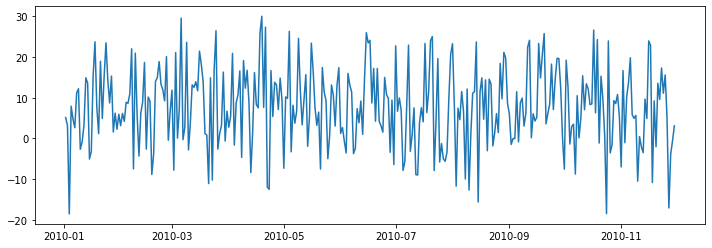

In [89]:
plt.figure(figsize=(12,4))
plt.plot(rand_diff)

This does look a lot like a white noise series!

## Summary

Great, you now know how a Random Walk and Moving Average model work!